- In this section, we recall the definition of the `kernel estimators` and their kernel functions

- In the next session (part 2); we will discuss the upper bound of the MSE of these kernel estimators.

- Let $X_1, \ldots, X_n$ be the i.i.d random variables that have a probability density $p$ with respect to the Lebesgue measure on $\mathbb{R}.$ The corresponding distribution function is 
$$F(x) = \int_{-\infty}^x p(t) dt.$$

Let's consider the empirical distribution function
$$ F_n(x) = n^{-1} \sum_{k=1}^n \mathbb{I}_{(-\infty, x)}(X_k), $$
where $\mathbb{I}$ denotes the indicator function.

- By the SLLN (strong law of large numbers), we have $$F_n(x) \to F(x), \quad \forall x \in \mathbb{R},$$ 

now, how can we estimate the `true density` $p ?$ For sufficiently small $h > 0$, by mean value theorem, we have

$$ p(x) \approx \frac{F(x+h) - F(x-h)}{2h} $$

Then, replacing $F$ by the empirical distribution; we get

$$ \widehat{p}(x, h) = \frac{F_n(x+h) - F_n(x-h)}{2h} = \frac{1}{2nh} \sum_{k=1}^n \mathbb{I}_{(x-h, x+h)}(X_k) = \frac{1}{nh} \sum_{k=1}^n K\left( \frac{X_k - x}{h} \right)$$

be called the `kernel density estimator.` Such a function `K` is called a `kernel` and the parameter `h` is called a `bandwidth` of the `kernel density estimator.`

- Following are the shape of some classical kernels:

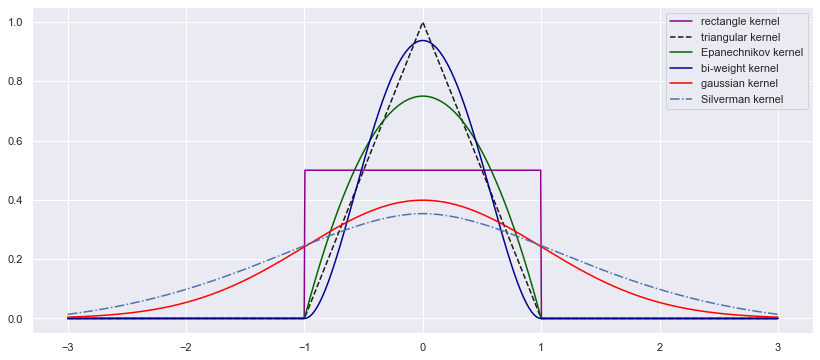

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (14, 6)})

## range of values
u = np.linspace(-3, 3, 1001)

## define the kernel
rect = 0.5 * (abs(u) <= 1)
tri = (1 - abs(u))*(abs(u) <= 1)
epa = 0.75*(1 - u**2)*(abs(u) <= 1)
biw = (15/16)*(1-u**2)**2*(abs(u) <= 1)
gau = (1/np.sqrt(2*np.pi))*np.exp(-u**2/2)
sil = 0.5*np.exp(-abs(u / np.sqrt(2)))*np.sin(abs(u / np.sqrt(2)) + np.pi/4)

## Display the kernels
plt.plot(u, rect, 'darkmagenta', label = 'rectangle kernel')
plt.plot(u, tri, 'k--', label = 'triangular kernel')
plt.plot(u, epa, 'darkgreen', label = 'Epanechnikov kernel')
plt.plot(u, biw, 'darkblue', label = 'bi-weight kernel')
plt.plot(u, gau, 'red', label = 'gaussian kernel')
plt.plot(u, sil, 'b-.', label = 'Silverman kernel')

plt.legend()
plt.show()

A simple example about the `"k.d.e"` with different kernel from the real data in `iris-dataset`

First, we compare to the `availalbe` function in seaborn.kdeplot with the kernel = `"gau"`; since the kernel other than `gau` requires statsmodels.

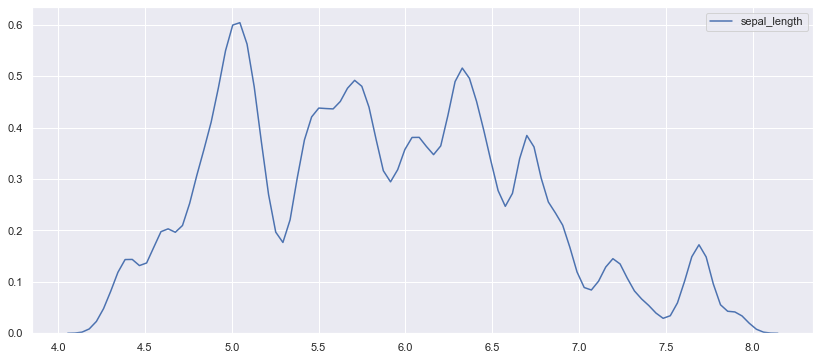

In [2]:
iris = sns.load_dataset("iris")
x = iris.sepal_length
band_width = 1 / np.sqrt(len(x))
sns.kdeplot(x, kernel = 'gau', bw = band_width)

Now, we will find the `k.d.e` for another kernel by rewriting the kernel_function

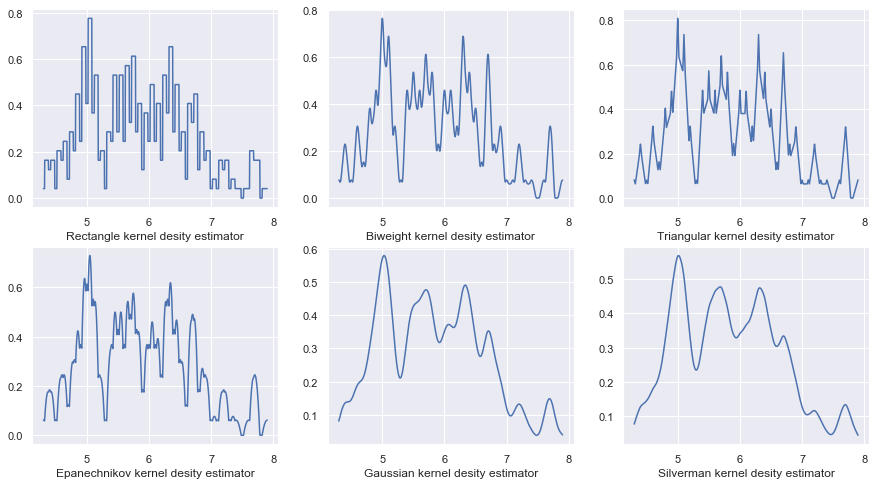

In [3]:
n = len(x)
h = 1/(np.sqrt(n))
u = np.linspace(min(x), max(x), 1000)

## Define the kernel_function
def rect_kernel(t):
    return 0.5 * (abs(t) <= 1)

p_1_hat = np.array(len(u)*[0])
for x_k in x:
    p_1_hat = p_1_hat + rect_kernel((x_k - u)/h) / (n*h)

## Bi-weight kernel
def biw_kernel(t):
    return (15/16)*(1-t**2)**2*(abs(t) <= 1)

p_2_hat = np.array(len(u)*[0])
for x_k in x:
    p_2_hat = p_2_hat + biw_kernel((x_k - u)/h) / (n*h)

## Triangular kernel
def trig_kernel(t):
    return (1 - abs(t))*(abs(t) <= 1)

p_3_hat = np.array(len(u)*[0])
for x_k in x:
    p_3_hat = p_3_hat + trig_kernel((x_k - u)/h) / (n*h)

## Epanechnikov kernel
def epa_kernel(t):
    return 0.75*(1 - t**2)*(abs(t) <= 1)

p_4_hat = np.array(len(u)*[0])
for x_k in x:
    p_4_hat = p_4_hat + epa_kernel((x_k - u)/h) / (n*h)

## Gaussian kernel
def gau_kernel(t):
    return (1/np.sqrt(2*np.pi))*np.exp(-t**2/2)

p_5_hat = np.array(len(u)*[0])
for x_k in x:
    p_5_hat = p_5_hat + gau_kernel((x_k - u)/h) / (n*h)

## Silverman kernel    
def silv_kernel(t):
    return 0.5*np.exp(-abs(t / np.sqrt(2)))*np.sin(abs(t / np.sqrt(2)) + np.pi/4)

p_6_hat = np.array(len(u)*[0])
for x_k in x:
    p_6_hat = p_6_hat + silv_kernel((x_k - u)/h) / (n*h)

## Display the k.d.e functions
sns.set(rc = {"figure.figsize" : (15, 8)})

plt.subplot(2,3,1)
plt.plot(u, p_1_hat)
plt.xlabel('Rectangle kernel desity estimator')

plt.subplot(2,3,2)
plt.plot(u, p_2_hat)
plt.xlabel('Biweight kernel desity estimator')

plt.subplot(2,3,3)
plt.plot(u, p_3_hat)
plt.xlabel('Triangular kernel desity estimator')

plt.subplot(2,3,4)
plt.plot(u, p_4_hat)
plt.xlabel('Epanechnikov kernel desity estimator')

plt.subplot(2,3,5)
plt.plot(u, p_5_hat)
plt.xlabel('Gaussian kernel desity estimator')

plt.subplot(2,3,6)
plt.plot(u, p_6_hat)
plt.xlabel('Silverman kernel desity estimator')
plt.show()


**Comments**

1) The k.d.e has the kernel = `"rectangle"` looks like the `histogram` with the numbers of blocks = numbers of observations.

2) In the asymptotic framework, as $n \to \infty$ we will consider a bandwidth $h = h_n = h(n)$; and we will suppose that the sequence of band_width tends to $0$. 

3) The choice of a `small band-width h` corresponding to a large variance is called an `undersmoothing` while a `large h` the bias cannot be reasonably controlled, which leads to `oversmoothing`. 

See the figure below (we only consider the `'gaussian_kernel'` with the $h_n = n^{-a}$ where $a^{-1} = 1.5, 2, 5, 100$

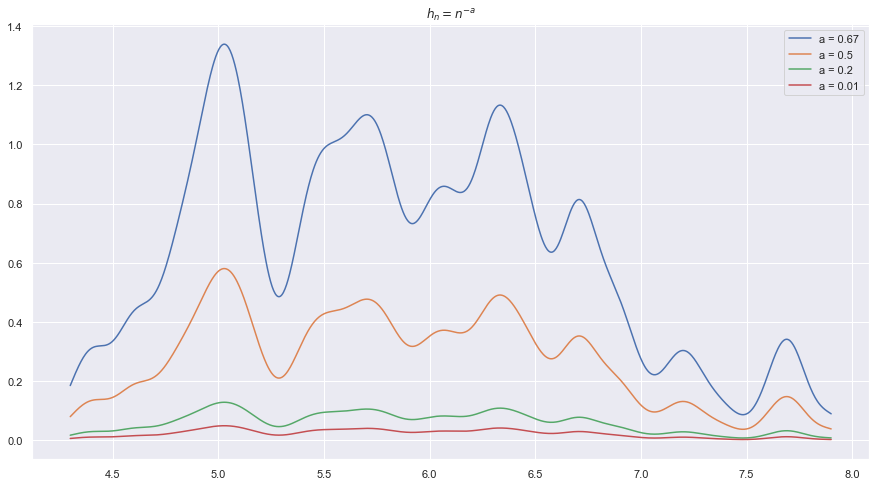

In [4]:
alpha = [2/3, 1/2, 1/5, 1/100]

for alp in alpha:
    
    bw = n**(-alp)
    p_hat = np.array(len(u)*[0])
    
    for x_k in x:
        p_hat = p_hat + gau_kernel((x_k - u)/h) / (n * bw)

    plt.title('$h_n = n^{-a}$')
    plt.plot(u, p_hat, label = 'a = '+str(round(alp, 2)))
    
    plt.legend()